## Decision tree


In [219]:
import pandas as pd

In [220]:
df= pd.read_csv("../Data/DataWithLocationCleaned.csv.gz")

In [221]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [222]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,2019,6,"(48.905266, -95.314404)"
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,2019,6,"(48.905266, -95.314404)"
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,2019,6,"(48.905266, -95.314404)"
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,6,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,6,"(48.905266, -95.314404)"


In [223]:
# correct Date types 
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes


Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Year                  int64
Month                 int64
position             object
dtype: object

In [224]:
# Add lagitude and longitude to be consistant with Arnaud
# Create one dataFrame for persons 
def getlat(x):
    lat = x.partition(',')[0][1:]
    if lat[0] == "'":
        lat = lat[1:-1]
    return lat

def getlong(x):
    lat = x.partition(',')[2]
    if lat[1] == "'":
        lat = lat[2:-2]
    else:
        lat = lat[1:-1]
    return lat

df['latitude'] = df['position'].apply(lambda x: getlat(x))
df['longitude'] = df['position'].apply(lambda x: getlong(x))


In [225]:

persons = df[df['Measure'].isin(['Bus Passengers','Pedestrians','Personal Vehicle Passengers','Train Passengers'])].reset_index().drop(columns=['index'])

persons.shape


(116131, 12)

In [226]:
#just a plus
# NOT RELEVANT but maybe for Arnaud on the map
persons.groupby(['Port Name']).sum().sort_values(['Value'],ascending=False).head()



,Port Code,Value,Year,Month
Port Name,,,,
San Ysidro,2736872,820753587,2193570,7033
El Paso,2709456,813405376,2264184,7260
Laredo,2518272,435119695,2193570,7033
Hidalgo,2519365,406092835,2193570,7033
Calexico,2648174,401463611,2122956,6806


In [227]:
# just testing
# NOT RELEVANT
persons.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Year         0
Month        0
position     0
latitude     0
longitude    0
dtype: int64

In [228]:
# just checking values...
# NOT RELEVANT
persons['Value'].describe()

count    1.161310e+05
mean     5.778344e+04
std      2.366958e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.560000e+02
75%      6.943000e+03
max      4.447374e+06
Name: Value, dtype: float64

In [229]:
nozero = persons[persons['Value'] != 0]
nozero.shape

(75624, 12)

In [230]:
nozero['quant'] = pd.qcut(nozero['Value'],q = 8, duplicates = 'drop')
print("intervalls for y:")
print(nozero['quant'].value_counts())
print()
le = LabelEncoder()
nozero['y'] = le.fit_transform(nozero["quant"])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


intervalls for y:
(0.999, 45.0]              9567
(142958.375, 4447374.0]    9453
(32053.0, 142958.375]      9453
(7484.0, 32053.0]          9452
(740.0, 2394.0]            9452
(2394.0, 7484.0]           9451
(190.0, 740.0]             9450
(45.0, 190.0]              9346
Name: quant, dtype: int64



In [231]:
# check categories...
# NOT RELEVANT
nozero.sort_values(['Value'],ascending=False).head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position,latitude,longitude,quant,y
90369,El Paso,Texas,2402,US-Mexico Border,2001-03-01,Personal Vehicle Passengers,4447374,2001,3,"(31.7600372, -106.487287)",31.7600372,-106.487287,"(142958.375, 4447374.0]",7
93325,El Paso,Texas,2402,US-Mexico Border,2000-08-01,Personal Vehicle Passengers,4291774,2000,8,"(31.7600372, -106.487287)",31.7600372,-106.487287,"(142958.375, 4447374.0]",7
90890,El Paso,Texas,2402,US-Mexico Border,2001-02-01,Personal Vehicle Passengers,4281175,2001,2,"(31.7600372, -106.487287)",31.7600372,-106.487287,"(142958.375, 4447374.0]",7
90034,El Paso,Texas,2402,US-Mexico Border,2001-04-01,Personal Vehicle Passengers,4252128,2001,4,"(31.7600372, -106.487287)",31.7600372,-106.487287,"(142958.375, 4447374.0]",7
93966,El Paso,Texas,2402,US-Mexico Border,2000-06-01,Personal Vehicle Passengers,4235244,2000,6,"(31.7600372, -106.487287)",31.7600372,-106.487287,"(142958.375, 4447374.0]",7


In [232]:
# CONCLUSION ON WHY WE USED THOSE TECHNIQUES
# observations de base totale dans persons: 116131
# observations en enlevant les ports qui ont moins que 1100 VALUE: 10147 et 9 ports
# observations en enlevant aléatoirement la moitié des données dans la première catégorie: 86870 


In [268]:
#features but possibly add lat, long, measure
X = nozero[["Year","Month", "Port Code"]]
y = nozero["y"]
X.shape

(75624, 3)

In [269]:
X.isnull().sum()

Year         0
Month        0
Port Code    0
dtype: int64

In [270]:
X.head()

,Year,Month,Port Code
0,2019,6,3423
1,2019,6,3423
2,2019,6,3423
3,2019,6,3426
4,2019,6,3426


In [271]:
y = y.astype('int')
y.head()


0    5
1    0
2    1
3    4
4    1
Name: y, dtype: int64

In [272]:
y.shape

(75624,)

In [273]:
nozero.shape

(75624, 14)

In [274]:
nozero.reset_index().head(10)

,index,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position,latitude,longitude,quant,y
0,0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,6,"(48.905266, -95.314404)",48.905266,-95.314404,"(7484.0, 32053.0]",5
1,1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,6,"(48.905266, -95.314404)",48.905266,-95.314404,"(0.999, 45.0]",0
2,2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Bus Passengers,63,2019,6,"(48.905266, -95.314404)",48.905266,-95.314404,"(45.0, 190.0]",1
3,3,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Personal Vehicle Passengers,7385,2019,6,"(48.7710371, -95.7697882)",48.7710371,-95.7697882,"(2394.0, 7484.0]",4
4,4,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Bus Passengers,118,2019,6,"(48.7710371, -95.7697882)",48.7710371,-95.7697882,"(45.0, 190.0]",1
5,5,Detroit,Michigan,3801,US-Canada Border,2019-06-01,Personal Vehicle Passengers,599521,2019,6,"(42.3315509, -83.0466403)",42.3315509,-83.0466403,"(142958.375, 4447374.0]",7
6,6,Detroit,Michigan,3801,US-Canada Border,2019-06-01,Bus Passengers,6274,2019,6,"(42.3315509, -83.0466403)",42.3315509,-83.0466403,"(2394.0, 7484.0]",4
7,7,Del Rio,Texas,2302,US-Mexico Border,2019-06-01,Pedestrians,14898,2019,6,"(29.3627296, -100.896761)",29.3627296,-100.896761,"(7484.0, 32053.0]",5
8,8,Del Rio,Texas,2302,US-Mexico Border,2019-06-01,Personal Vehicle Passengers,238721,2019,6,"(29.3627296, -100.896761)",29.3627296,-100.896761,"(142958.375, 4447374.0]",7
9,9,Anacortes,Washington,3010,US-Canada Border,2019-06-01,Personal Vehicle Passengers,8348,2019,6,"(48.5020123, -122.6237356)",48.5020123,-122.6237356,"(7484.0, 32053.0]",5


In [275]:
# one-hot encoding for Border
one_hot = OneHotEncoder(categories="auto")
cat_to_onehot = one_hot.fit_transform(nozero[["Border"]]).toarray()
cat_to_onehot = pd.DataFrame(cat_to_onehot)
cat_to_onehot.shape
cat_to_onehot = cat_to_onehot.rename(columns={0: "Canada Border", 1: "Mexico Border"})

In [276]:
# one-hot encoding for Measure
one_hot1 = OneHotEncoder(categories="auto")
cat_to_onehot1 = one_hot1.fit_transform(nozero[["Measure"]]).toarray()
cat_to_onehot1 = pd.DataFrame(cat_to_onehot1)
cat_to_onehot1.shape
cat_to_onehot1 = cat_to_onehot1.rename(columns={0: "Bus Passengers", 1: "Pedestrians",2: "Personal Vehicle Passengers", 3: "Train Passengers"})

In [277]:
# one-hot encoding for State
one_hot2 = OneHotEncoder(categories="auto")
cat_to_onehot2 = one_hot2.fit_transform(nozero[["State"]]).toarray()
cat_to_onehot2 = pd.DataFrame(cat_to_onehot2)
cat_to_onehot2.shape
cat_to_onehot2 = cat_to_onehot2.rename(columns={5: "Michigan", 9: "New York"})

In [278]:
OH_list = [X.reset_index(drop=True),cat_to_onehot.reset_index(drop=True),cat_to_onehot1.reset_index(drop=True), cat_to_onehot2.reset_index(drop=True)]

In [279]:
X = pd.concat((OH_list), axis=1, join='inner')

X.shape

(75624, 23)

In [280]:
X.isnull().sum()

Year                           0
Month                          0
Port Code                      0
Canada Border                  0
Mexico Border                  0
Bus Passengers                 0
Pedestrians                    0
Personal Vehicle Passengers    0
Train Passengers               0
0                              0
1                              0
2                              0
3                              0
4                              0
Michigan                       0
6                              0
7                              0
8                              0
New York                       0
10                             0
11                             0
12                             0
13                             0
dtype: int64

In [281]:
#X = X.rename(columns={0: "Canada Border", 1: "Mexico Border"})
#X.head()


In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [283]:
clf = DecisionTreeClassifier(criterion='entropy')

In [284]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [285]:
# test accuracy
clf.score(X_test,y_test)

0.8427107438016529

In [286]:
# depth of the decision tree
clf.get_depth()

31

Tuning depth of the tree:

In [287]:
scores = []
for d in range(1, 21):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

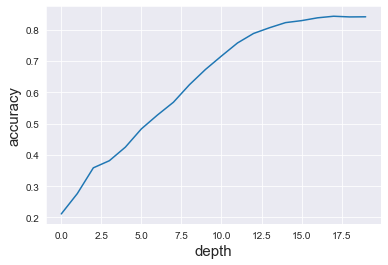

In [288]:
plt.plot(scores)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [289]:
# best depth
np.argmax(scores)

17

Feature importance

In [290]:
# feature importances for best classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)
clf.feature_importances_

array([0.        , 0.        , 0.34122781, 0.        , 0.15645587,
       0.        , 0.11001497, 0.31489358, 0.02520479, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01182105,
       0.        , 0.        , 0.        , 0.04038194, 0.        ,
       0.        , 0.        , 0.        ])

In [291]:
sorted(zip(X_train.columns, clf.feature_importances_), key=lambda x: x[1], reverse=True)

[('Port Code', 0.3412278061938924),
 ('Personal Vehicle Passengers', 0.31489357972080084),
 ('Mexico Border', 0.15645587215588516),
 ('Pedestrians', 0.11001497143236277),
 ('New York', 0.04038193512339265),
 ('Train Passengers', 0.025204785886919368),
 ('Michigan', 0.011821049486746798),
 ('Year', 0.0),
 ('Month', 0.0),
 ('Canada Border', 0.0),
 ('Bus Passengers', 0.0),
 (0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0)]

Visualizing the decision tree

In [292]:
#!pip install pydotplus
#!pip install graphviz

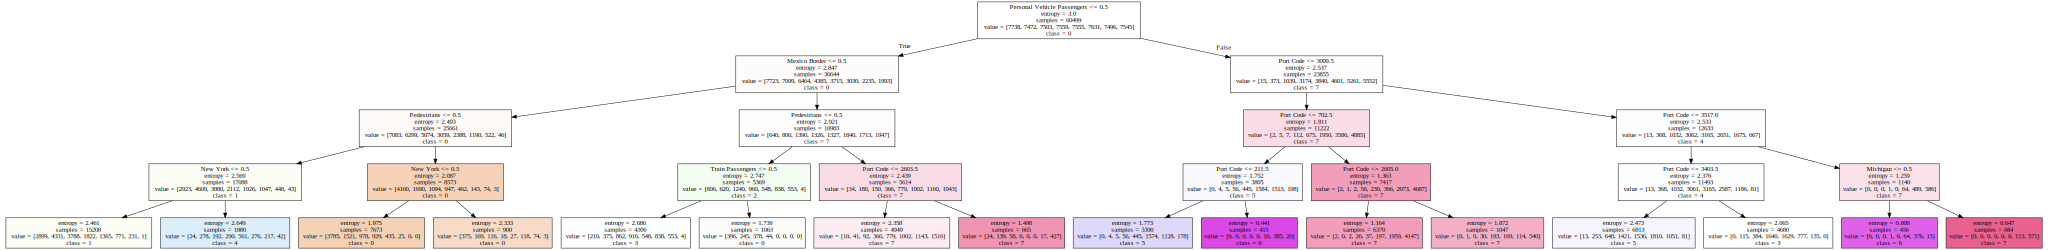

In [293]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(export_graphviz(clf, out_file=None
   , feature_names=X_train.columns, class_names=['0','1','2','3','4','5','6','7'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

No handles with labels found to put in legend.


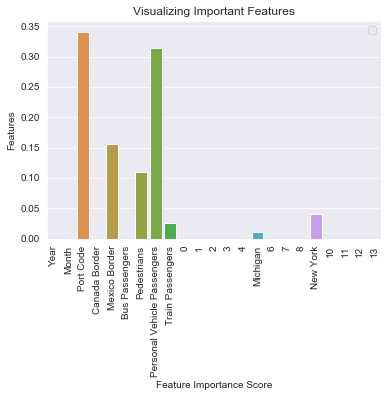

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=X_train.columns, y=clf.feature_importances_)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.xticks(rotation=90)
plt.show()




In [295]:
# AVANT!
# NOT RELEVANT
#[('Port Code', 0.8211952279698288),
#('Canada Border', 0.08627330116334954),
#('Year', 0.0731548912786358),
#('Month', 0.019376579588185828),
#('Mexico Border', 0.0)]